In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [171]:
white = pd.read_csv('data_winequality-white.csv', sep = ';')
red = pd.read_csv('data_winequality-red.csv', sep=';')

In [172]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [173]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [174]:
#label redwine as 1 and whitewine as 0

red['type'] = 1
white['type'] = 0

wines = red.append(white, ignore_index=True)

In [175]:
# check NAs
wines.isna().any().any()

False

In [176]:
#correlation
wines.corr()['type'].sort_values()

total sulfur dioxide   -0.700357
free sulfur dioxide    -0.471644
residual sugar         -0.348821
citric acid            -0.187397
quality                -0.119323
alcohol                -0.032970
pH                      0.329129
density                 0.390645
fixed acidity           0.486740
sulphates               0.487218
chlorides               0.512678
volatile acidity        0.653036
type                    1.000000
Name: type, dtype: float64

In [177]:
#plt.matshow(wines.corr())
corr = wines.corr()
corr.style.background_gradient().set_precision(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
fixed acidity,1,0.22,0.32,-0.11,0.3,-0.28,-0.33,0.46,-0.25,0.3,-0.095,-0.077,0.49
volatile acidity,0.22,1,-0.38,-0.2,0.38,-0.35,-0.41,0.27,0.26,0.23,-0.038,-0.27,0.65
citric acid,0.32,-0.38,1,0.14,0.039,0.13,0.2,0.096,-0.33,0.056,-0.01,0.086,-0.19
residual sugar,-0.11,-0.2,0.14,1,-0.13,0.4,0.5,0.55,-0.27,-0.19,-0.36,-0.037,-0.35
chlorides,0.3,0.38,0.039,-0.13,1,-0.2,-0.28,0.36,0.045,0.4,-0.26,-0.2,0.51
free sulfur dioxide,-0.28,-0.35,0.13,0.4,-0.2,1,0.72,0.026,-0.15,-0.19,-0.18,0.055,-0.47
total sulfur dioxide,-0.33,-0.41,0.2,0.5,-0.28,0.72,1,0.032,-0.24,-0.28,-0.27,-0.041,-0.7
density,0.46,0.27,0.096,0.55,0.36,0.026,0.032,1,0.012,0.26,-0.69,-0.31,0.39
pH,-0.25,0.26,-0.33,-0.27,0.045,-0.15,-0.24,0.012,1,0.19,0.12,0.02,0.33
sulphates,0.3,0.23,0.056,-0.19,0.4,-0.19,-0.28,0.26,0.19,1,-0.003,0.038,0.49


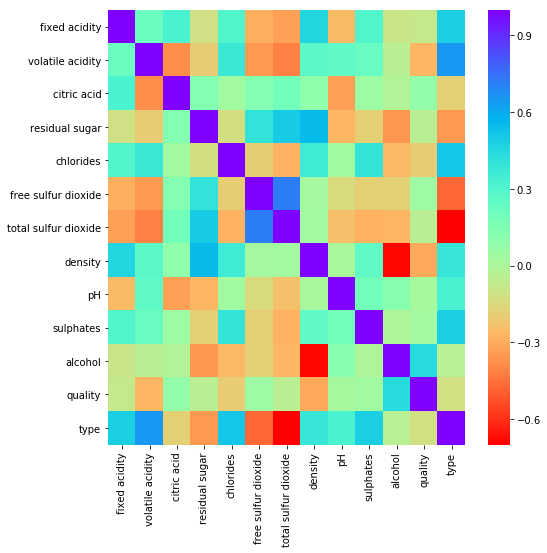

In [178]:
plt.figure(figsize=(8, 8))
sns.heatmap(wines.corr(), cmap='rainbow_r')
plt.show()

In [179]:
# due to high correlation of 'volatile acidity', 'total sulfur dioxice' and 'sulphates' 
# we will look deeper into these variables. 

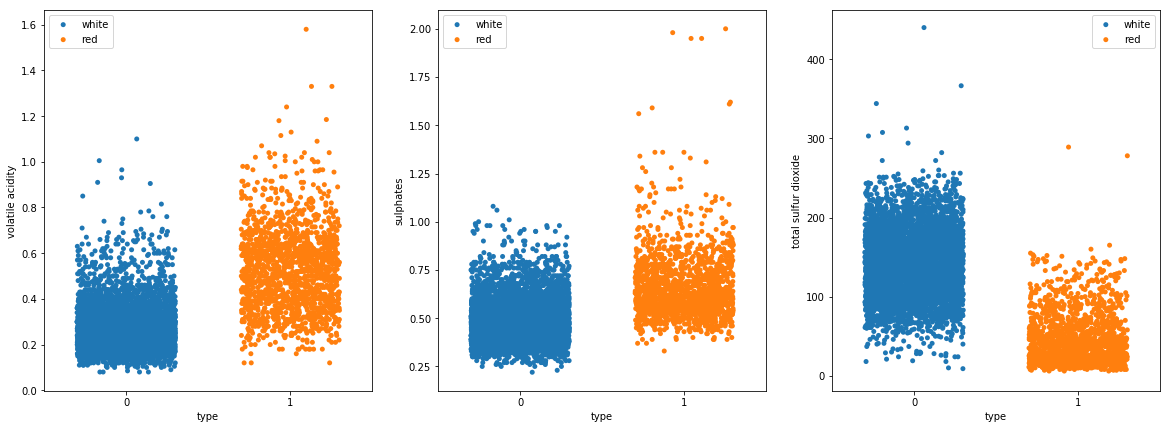

In [180]:
plt.figure(figsize=(20,7))
p1 = plt.subplot2grid((1,3), (0,0))
p2 = plt.subplot2grid((1,3), (0,1))
p3 = plt.subplot2grid((1,3), (0,2))

p1 = sns.stripplot(x='type', y='volatile acidity', data=wines, jitter=0.3, ax=p1)
p1.legend(['white', 'red'], loc=0)

p2 = sns.stripplot(x='type', y='sulphates', data=wines, jitter=0.3, ax=p2)
p2.legend(['white', 'red'], loc=0)

p3 = sns.stripplot(x='type', y='total sulfur dioxide', data=wines, jitter=0.3, ax=p3)
p3.legend(['white', 'red'], loc=0)

In [181]:
# data preprocessing

In [182]:
from sklearn.model_selection import train_test_split

X = wines.iloc[:,0:11]
y = wines['type']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [183]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [184]:
# neural network

In [185]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(11, activation='relu', input_shape=(11, )))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [186]:
# compile and training
model.compile(loss='binary_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])
    

In [187]:
history = model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_test_scaled, y_test)) 

Train on 5197 samples, validate on 1300 samples
Epoch 1/50
5197/5197 [==============================] - 1s 154us/step - loss: 0.7298 - acc: 0.5332 - val_loss: 0.6012 - val_acc: 0.7800
Epoch 2/50
5197/5197 [==============================] - 0s 58us/step - loss: 0.5386 - acc: 0.8295 - val_loss: 0.4872 - val_acc: 0.8554
Epoch 3/50
5197/5197 [==============================] - 0s 54us/step - loss: 0.4111 - acc: 0.9213 - val_loss: 0.3438 - val_acc: 0.9546
Epoch 4/50
5197/5197 [==============================] - 0s 46us/step - loss: 0.2820 - acc: 0.9765 - val_loss: 0.2326 - val_acc: 0.9831
Epoch 5/50
5197/5197 [==============================] - 0s 46us/step - loss: 0.1936 - acc: 0.9860 - val_loss: 0.1647 - val_acc: 0.9854
Epoch 6/50
5197/5197 [==============================] - 0s 46us/step - loss: 0.1374 - acc: 0.9885 - val_loss: 0.1224 - val_acc: 0.9846
Epoch 7/50
5197/5197 [==============================] - 0s 46us/step - loss: 0.1022 - acc: 0.9898 - val_loss: 0.0968 - val_acc: 0.9862
Epoch 

In [194]:
def plot_history(history): 
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    ax[0].plot(history.history['loss'])
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylim([0, 1])
    ax[0].set_title('Loss over Epochs')
    ax[0].plot(history.history['val_loss'])
    ax[0].legend(['Training loss', 'Prediction loss'])

    ax[1].plot(history.history['acc'])
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylim([0.7, 1])
    ax[1].set_title('Accuracy over Epochs')
    ax[1].plot(history.history['val_acc'])
    ax[1].legend(['Training accuracy', 'Prediction accuracy'])

    fig.suptitle("Model Quality over Epochs")

    plt.show()
    
    
    

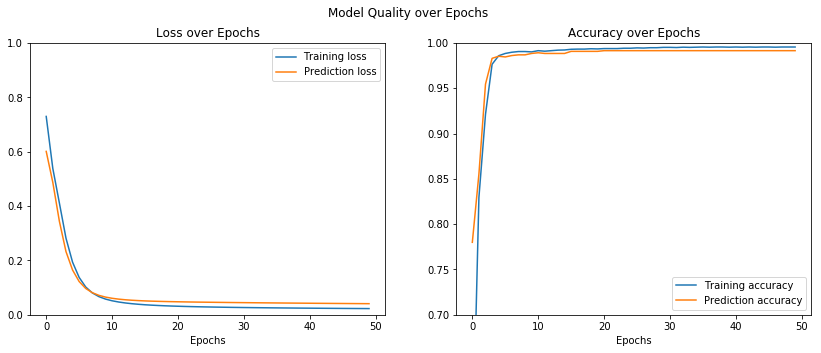

In [195]:
plot_history(history)

In [190]:
# evaluation
from numpy import round

y_predicted = model.predict(X_test_scaled)

print('Predicted: {}, actual {}'.format(round(y_predicted[0]), y_test.ravel()[0]))


Predicted: [0.], actual 0


In [191]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)

print('Loss: {}, accuracy: {}'.format(loss, accuracy))

1300/1300 [==============================] - 0s 34us/step
Loss: 0.04089906544066393, accuracy: 0.9915384615384616
